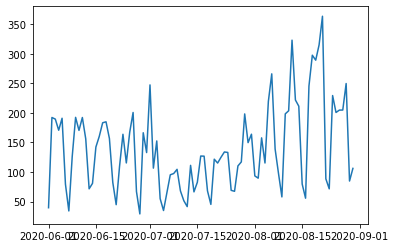

In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from datetime import datetime

#Importing file
dataframe = pd.read_csv("/Users/ainaflones/Downloads/Ruter_data.csv", delimiter=";")

#Creating DataFrame with relevant columns and information. 
dataframe2 = pd.DataFrame(dataframe, columns = ['Dato', 'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra', 'Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'])

#In this case all rows where the arrival time is after the planned arrival. 
dataframe2=dataframe2[(dataframe2['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] > dataframe2['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'])]

#converting the times to datetime objects
dataframe2['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra']= pd.to_datetime(dataframe2['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'], format='%H:%M:%S', errors='coerce')
dataframe2['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra']= pd.to_datetime(dataframe2['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'],format='%H:%M:%S', errors='coerce')

#Finding the difference in time between actual and planned arrival. 
dataframe2 ['forskjell'] = dataframe2.apply( lambda x: pd.Timedelta( x['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] - x['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra']).seconds/60, axis =1)

#Creating a dataframe for the date and results
Dataframe_tidsforskjell= pd.DataFrame(dataframe2, columns = ['Dato', 'forskjell'])

#Changing the date-format to be able to sort by date. 
Dataframe_tidsforskjell['Dato'] = pd.to_datetime(Dataframe_tidsforskjell['Dato'], format="%d.%m.%Y")

#Combining the the minutes and seconds the bus was late for each trip. Using this we can find how late the 
#bus was each day. 
Dataframe_tidsforskjell= Dataframe_tidsforskjell.groupby(Dataframe_tidsforskjell['Dato'])['forskjell'].sum()

#Making the graph.
plt.plot(Dataframe_tidsforskjell)
plt.show()